## Final Project Submission

Please fill out:
* Student name: Calvine Dasilver
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita
* Blog post URL:


 #  Demystifying House Sales Analysis with Regression Modeling in a Northwestern County

   ## Project Overview

   ### <li>**Business Understanding**

The real estate market plays a crucial role in the economic health and stability of a region. Understanding the factors that influence house prices is essential for both buyers and sellers to navigate the market effectively. This project focuses on a specific northwestern county in the United States, aiming to shed light on the key determinants of property valuation in this area.
   ##### Problem Statements:
What are the most significant factors influencing house prices in this northwestern county?How can we quantify the relationship between these factors and property value?Can we develop a reliable model to predict house prices based on relevant characteristics?
   ##### Challenges:
* Real estate data can be complex and multifaceted, encompassing various property features and local market trends.
* Accurately identifying and quantifying the relative impact of each factor on house prices can be challenging.
* External factors like economic conditions and interest rates might also influence prices, requiring careful consideration.

##### Proposed Solutions:
We propose utilizing multiple linear regression, a powerful machine learning technique. This method allows us to analyze a large dataset of house sales and identify the statistical relationships between various property features (e.g., square footage, number of bedrooms, location) and the corresponding sale prices.
   ##### Objectives:
1. Develop a robust multiple linear regression model that accurately predicts house prices in the chosen northwestern county.
2. Identify the most significant factors influencing property value within this specific market.
3. Provide valuable insights into the housing market dynamics of the region, benefiting potential buyers, real estate agents, and other stakeholders.
   
 
**Research questions that would help to achieve the objectives**:

1. How does the number of bedrooms, bathrooms, grade and square footage of a house correlate with its sale price in King County?
2. How much can a homeowner expect the value of their home to increase after a specific renovation project?
3. Which renovation projects have the most significant impact on a home's market value in the northwestern county?
4. Are there specific combinations of renovation projects that provide an interdependent effect on a home's market value?

   ### <li> **Data Understanding**

Our analysis leverages the King County House Sales dataset - a rich resource containing over 21,500 records and 20 distinct features(columns). Spanning house sales from May 2014 to May 2015, this dataset provides a comprehensive snapshot of the King County housing market during that period.

**The King County House Sales dataset contains the following columns;**

id - unique identified for a house

date - Date house was sold 

Price - Sale price (prediction target)

bedrooms - Number of bedrooms,

bathrooms - Number of bathrooms,

sqft_living - Square footage of living space in the home,

sqft_lot - Square footage of the lot,

floors - Number of floors (levels) in house,

view - Quality of view from house,

condition - How good the overall condition of the house is. Related to maintenance of house,

grade - Overall grade of the house. Related to the construction and design of the house,

sqft_above - Square footage of house apart from basement,

sqft_basement - Square footage of the basement,

yr_built - Year when house was built,

yr_renovated - Year when house was renovated,

zipcode - ZIP Code used by the United States Postal Service,

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and

sell_yr - Date house was sold.


We need to be aware of certain constraints within the data, as these might influence our analysis and interpretation of the results. From the sources;

1. The data may contain anomalies or inconsistencies that require careful examination during analysis. For instance, a record lists a house with 33 bedrooms, which appears to be an outlier

2. It's important to consider the time frame of the data (May 2014 - May 2015) as it may not fully capture the current market dynamics in King County.
3. It's important to acknowledge the scope of the data. While it provides details on house features, it may not capture external factors such as interest rates or the overall economic climate, which can also play a role in determining property values.

DATA PREPARATION

In [87]:
import csv
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [88]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [89]:
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [90]:
#checking null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [91]:
#checking on data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [92]:
#statistical summary
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


tatistical summary observation count for each column is 21597 this shows that we dont have missing values The mean value of the house price is USD 540297 while the minimum house price is USD 78000 and maximum house price is USD 7700000 The standard deviation of the house price stands at USD 367368.

In [93]:
#we'll focus on the columns mentioned above and drop the rest
df.drop(columns=['id','lat','long','sqft_lot','floors','waterfront','view','zipcode','sqft_living15','sqft_lot15','grade','yr_renovated','sqft_above','sqft_basement'],inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built
0,10/13/2014,221900.0,3,1.00,1180,Average,1955
1,12/9/2014,538000.0,3,2.25,2570,Average,1951
2,2/25/2015,180000.0,2,1.00,770,Average,1933
3,12/9/2014,604000.0,4,3.00,1960,Very Good,1965
4,2/18/2015,510000.0,3,2.00,1680,Average,1987


In [94]:
#checking for for null values
df.isna().sum()

date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
condition      0
yr_built       0
dtype: int64

In [95]:
#converting date to datetime format
df['date']=pd.to_datetime(df['date'])
#extracting year from date column
df.date=df['date'].dt.year
df.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built
0,2014,221900.0,3,1.00,1180,Average,1955
1,2014,538000.0,3,2.25,2570,Average,1951
2,2015,180000.0,2,1.00,770,Average,1933
3,2014,604000.0,4,3.00,1960,Very Good,1965
4,2015,510000.0,3,2.00,1680,Average,1987


In [96]:
# Creating a new column for sell year
df['sell_yr'] = pd.to_datetime(df['date'],format='%Y').dt.year
df.drop(columns='date', inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,sell_yr
0,221900.0,3,1.00,1180,Average,1955,2014
1,538000.0,3,2.25,2570,Average,1951,2014
2,180000.0,2,1.00,770,Average,1933,2015
3,604000.0,4,3.00,1960,Very Good,1965,2014
4,510000.0,3,2.00,1680,Average,1987,2015


In [97]:
#creating column house age at year of sale
df['house_age']=df['sell_yr']-df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,sell_yr,house_age
0,221900.0,3,1.00,1180,Average,1955,2014,59
1,538000.0,3,2.25,2570,Average,1951,2014,63
2,180000.0,2,1.00,770,Average,1933,2015,82
3,604000.0,4,3.00,1960,Very Good,1965,2014,49
4,510000.0,3,2.00,1680,Average,1987,2015,28


In [98]:
#transformation of categorical values 'condition' column
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,sell_yr,house_age
0,221900.0,3,1.00,1180,3,1955,2014,59
1,538000.0,3,2.25,2570,3,1951,2014,63
2,180000.0,2,1.00,770,3,1933,2015,82
3,604000.0,4,3.00,1960,5,1965,2014,49
4,510000.0,3,2.00,1680,3,1987,2015,28


In [99]:
#converting the 'sell_yr' column to int64
df['sell_yr'] = df['sell_yr'].astype('int64')
df.head()

,price,bedrooms,bathrooms,sqft_living,condition,yr_built,sell_yr,house_age
0,221900.0,3,1.00,1180,3,1955,2014,59
1,538000.0,3,2.25,2570,3,1951,2014,63
2,180000.0,2,1.00,770,3,1933,2015,82
3,604000.0,4,3.00,1960,5,1965,2014,49
4,510000.0,3,2.00,1680,3,1987,2015,28


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   condition    21597 non-null  int64  
 5   yr_built     21597 non-null  int64  
 6   sell_yr      21597 non-null  int64  
 7   house_age    21597 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.3 MB


EXPLANATORY DATA ANALYSIS

In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends using univariate,bivariate and multivariate analysis

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

Univariate Analysis

Univariate analysis involves the examination of single variables.We focus in the summary statistics of target variable-price to help us undersatand the distribution and skewness of house prices

Basic Statistics of Price:
 count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


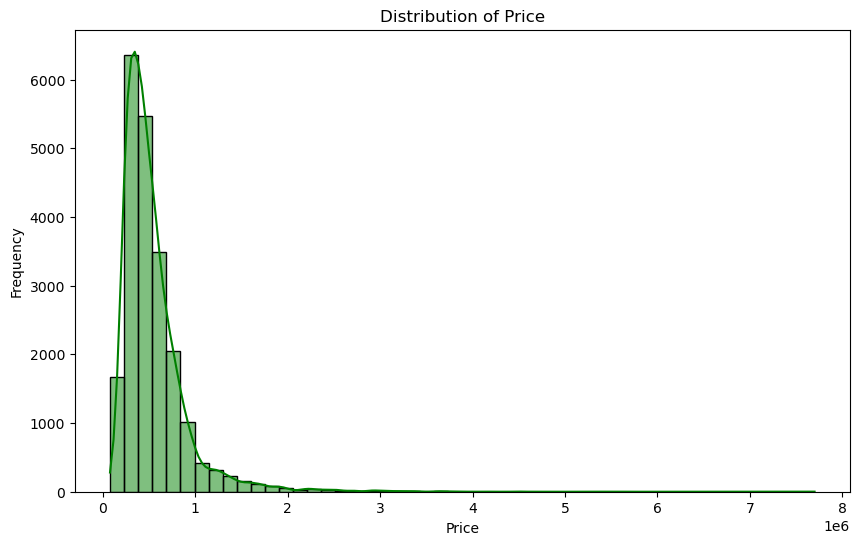

In [101]:
# Display summary statistics of the 'price' variable
price_stats = df['price'].describe()
print("Basic Statistics of Price:\n", price_stats)

# Visualizing the distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of house price is positively skewed suggesting that while most houses are concentrated around lower prices, there are some properties with significantly higher prices.

Bivariate Analysis

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

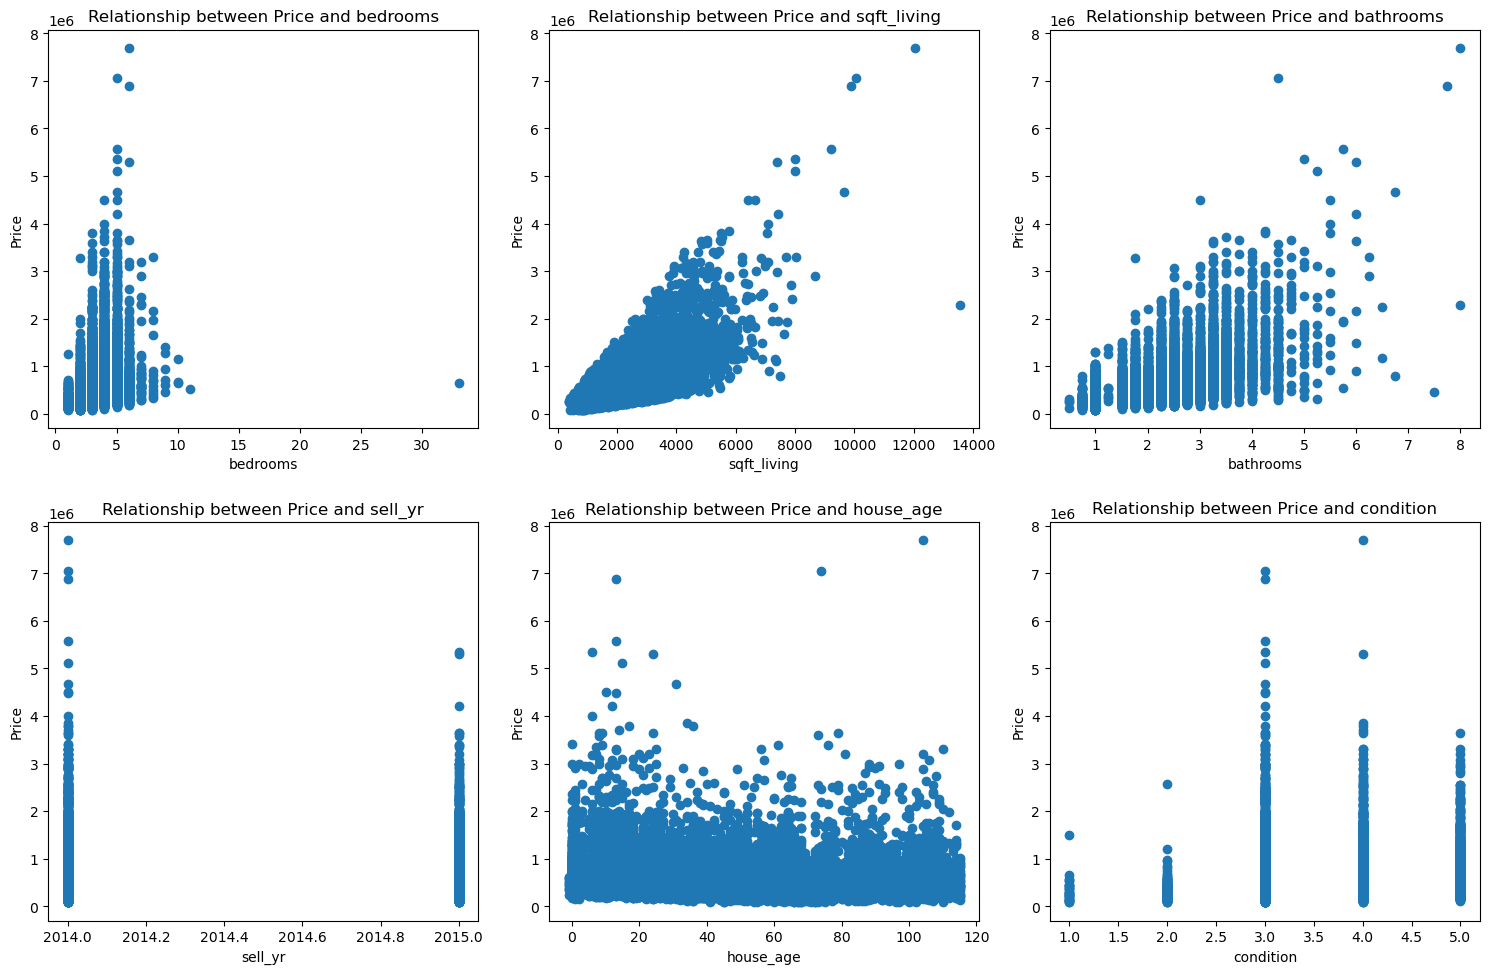

In [103]:
#relationships between our target variable and other independent variables in the dataset
import math
variables = ['bedrooms','sqft_living','bathrooms','sell_yr','house_age','condition']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[var],df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()